# A linear classifier

In this report I will briefly touch on some of the aspects of lab 3. We will share a look at a graph with a default line (linear decision boundary), highlighting the classified data points.  

Further on we will see other examples of such lines and classifications. I will give my view on the code, examples and whether or not a linear classifier would be best for this type of classification.  

Let us start with the default example.  

## Import and run, plot and classify

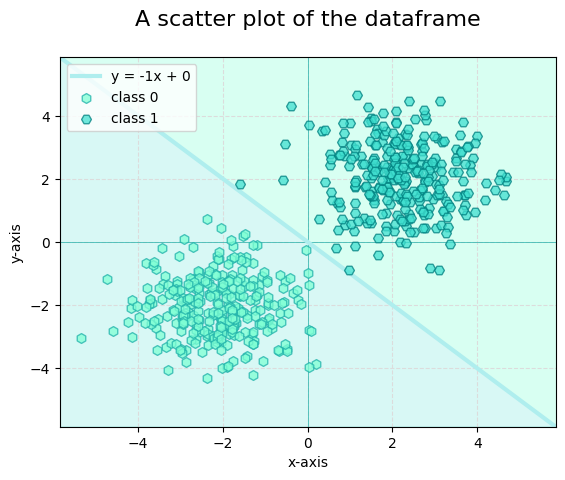

In [3]:
# import lab3 as l3
from lab3 import read_file, classifier, write_file, create_figure, plot_line, plot_scatter
import numpy as np
import matplotlib.pyplot as plt

# default line values
K = -1
X = np.linspace(-10, 10)
M = 0

# use the data
dataframe = read_file("unlabelled_data.csv")
labels = classifier(dataframe, K, M)
dataframe_labelled = write_file(dataframe, labels)
ax = create_figure(dataframe)

# plot the default graph
plot_line(ax, X, K, M)
plot_scatter(ax, dataframe_labelled)
plt.show()

To draw the line I use the formula:

*y = kx + m*

As you can tell from the above, a very simple decision boundary (*k* = -1, *m* = 0) clearly splits the different data points in two clusters. The values themselves were chosen as rough estimates.  

Is it perfect? I would not say so. There are "outliers" between the two larger clusters that could just as well belong to the other group if we had correct labels to work with, which would shift the boundary.  

How is the current split then? Let's look at the number of points in each class.  

### Amount of each class

In [12]:
def counting_labels(labels):

    lefties = 0
    righties = 0   

    for i in labels:
        if i == 0:
            lefties += 1
        else:
            righties += 1
    
    return lefties, righties


lefties, righties = counting_labels(labels)
print(f"The number of lefties is {lefties}.")
print(f"The number of righties is {righties}.")

The number of lefties is 298.
The number of righties is 302.


From now on we refer to each class to the relative position of the points in relation to the boundary line using the highly scientific terms "lefties" and "righties". 

As shown the split is not perfectly even but it would not have to be, to be correct. Stating that, let's take a look at other examples as to have something to relate to. What happens to the mentioned outliers?  

To do this I need to implement some new functions since my script was optimised for only one line and plot.  

## Plotting other examples

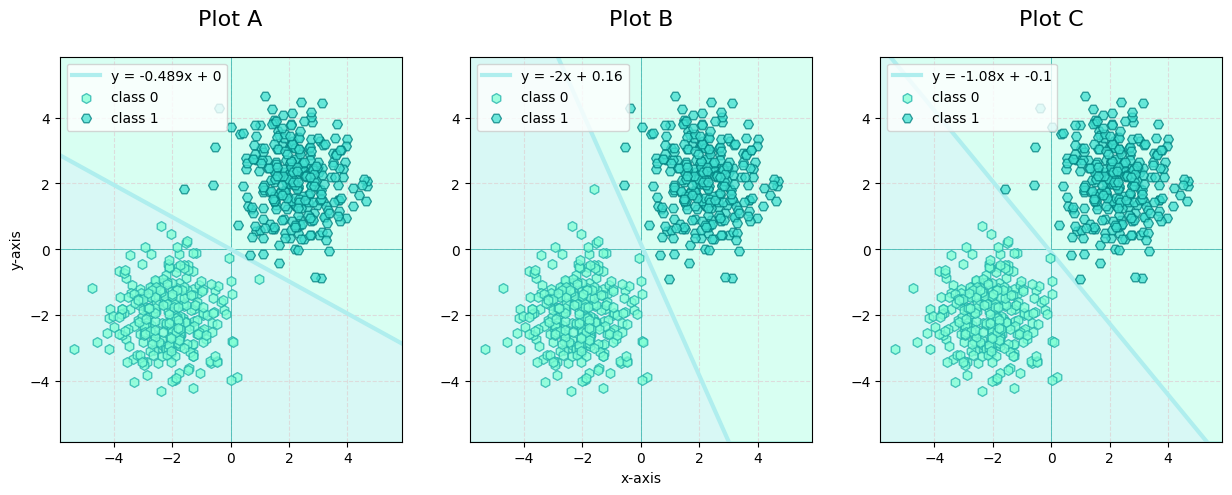


-------------------------------------------------
| Plot A        | Plot B        | Plot C        |
-------------------------------------------------
| Lefties:  299 | Lefties:  299 | Lefties:  298 |
| Righties: 301 | Righties: 301 | Righties: 302 |
-------------------------------------------------



In [18]:
def axes_shared_values(ax, df):

    ax.axhline(y=0, color="lightseagreen", linewidth=0.5, zorder=2)
    ax.axvline(x=0, color="lightseagreen", linewidth=0.5, zorder=2)
    max_limit = max(abs(df.values.min()), abs(df.values.max()))
    ax.set_xlim(-max_limit - 0.5, max_limit + 0.5)
    ax.set_ylim(-max_limit - 0.5, max_limit + 0.5)
    ax.grid(True, color="gainsboro", linestyle="dashed", zorder=1)


def create_figures(df):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

    axes_shared_values(ax1, dataframe)
    axes_shared_values(ax2, dataframe)
    axes_shared_values(ax3, dataframe)

    # ax2.set_title("Three other examples shown in scatter plots\n", fontsize = 16)
    ax1.set_title("Plot A\n", fontsize = 16)
    ax2.set_title("Plot B\n", fontsize = 16)
    ax3.set_title("Plot C\n", fontsize = 16)
    ax2.set_xlabel("x-axis")
    ax1.set_ylabel("y-axis")

    return ax1, ax2, ax3


ax1, ax2, ax3 = create_figures(dataframe)
examples = [[ax1, -0.489, 0], [ax2, -2, 0.16], [ax3, -1.08, -0.1]]

label_lst = []

for ax, k, m in examples:
    labels = classifier(dataframe, k, m)
    dataframe_labelled = write_file(dataframe, labels)
    plot_line(ax, X, k, m)
    plot_scatter(ax, dataframe_labelled)
    lefties, righties = counting_labels(labels)
    label_lst.append([lefties, righties])

plt.show()

print(f"""
-------------------------------------------------
| Plot A        | Plot B        | Plot C        |
-------------------------------------------------
| Lefties:  {label_lst[0][0]} | Lefties:  {label_lst[1][0]} | Lefties:  {label_lst[2][0]} |
| Righties: {label_lst[0][1]} | Righties: {label_lst[1][1]} | Righties: {label_lst[2][1]} |
-------------------------------------------------
""")

Let us refer to these as A, B and C.  

A gives us a slightly more horisontal slope, B is more vertically inclined and C shows a miniscule difference from my initial (default) boundary.  

Which is to prefer? We do not know. Since the data set we are working with contains no labels I have practically been trying to find a linear classification, manually, without the possibility of verifying the result. Hence I can't say for certain that the data is linearly separable.  

However, the slight variation that C gives what I feel to be a better split between the two clusters. The lefties are, from the looks of things, more densely populated. Increasing (or decreasing, since it's a negative value) the slope provides a more well distributed line in my opinion.  

## An improved analysis

Since I have been working with an unlabelled dataset, a better method would perhaps be to try out techniques that are common for classification using unsupervised learning.  

One approach would be to make use of the capacity of artificial neural networks. Algorithms such as Adaptive Resonance Theory (ART) or a self-organising map (SOM) can be used for pattern recognition and prediction. Otherwise we could utilise K-Means, Hierarchical clustering or Gaussian Mixture Models which would use distance metrics to identify the clusters.  

I would perhaps go with k-means clustering since we can tell from the plotted data how many clusters there are (*k* = 2) and as we saw the number of lefties and righties are close to equal (at least in our own classification attempt). Perhaps the outliers could pose a problem better handled by another algorithm and this why we should test several approaches to find what suits our needs the best. This also depends on the structure of the data itself. 